## Bernsein--Vazirani algorithm

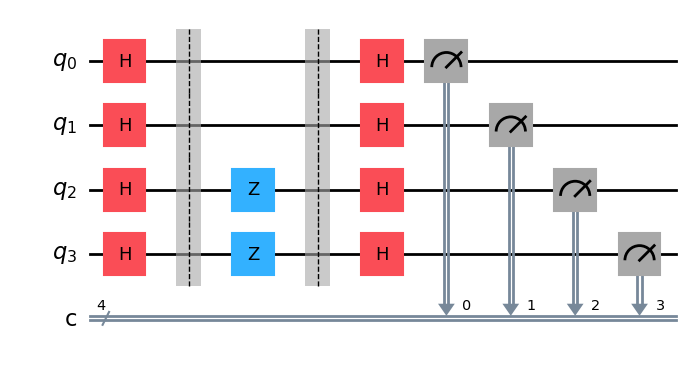

In [2]:
from qiskit import QuantumCircuit

n = 4
qc = QuantumCircuit(n,n)

qc.h(range(0,4))
qc.barrier()
qc.z(2)
qc.z(3)
qc.barrier()
qc.h(range(0,4))
qc.measure(range(0,4),range(0,4))

qc.draw('mpl')

In [3]:
# PUBs on aer Simulator
from qiskit import transpile
from qiskit_ibm_runtime import SamplerV2
from qiskit_aer import AerSimulator

aer_simulator = AerSimulator()

sampler_aer = SamplerV2(mode = aer_simulator)

qc_tr = transpile(qc, backend = aer_simulator)

job_aer = sampler_aer.run([(qc_tr,None,100),(qc_tr,None,1000)]) #PUB = (circuit, paramters, shots)



In [4]:
results_aer = job_aer.result()
counts_100 = results_aer[0].data.c.get_counts()

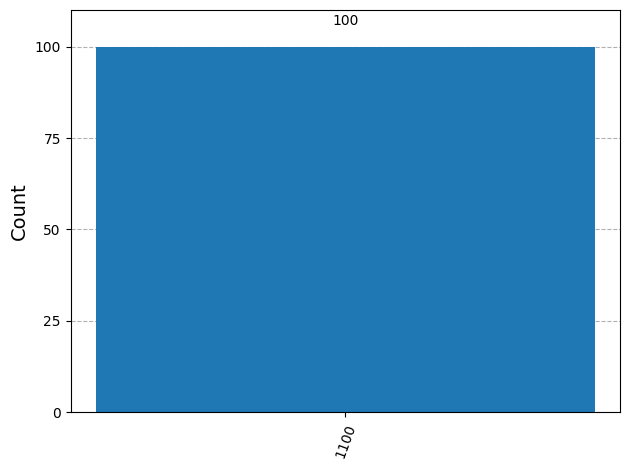

In [5]:
from qiskit.visualization import plot_histogram, plot_distribution

plot_histogram(counts_100)

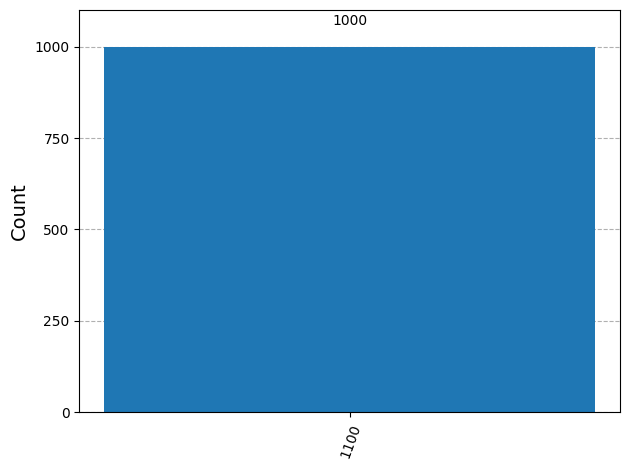

In [6]:
counts_1000 = results_aer[1].data.c.get_counts()
plot_histogram(counts_1000)

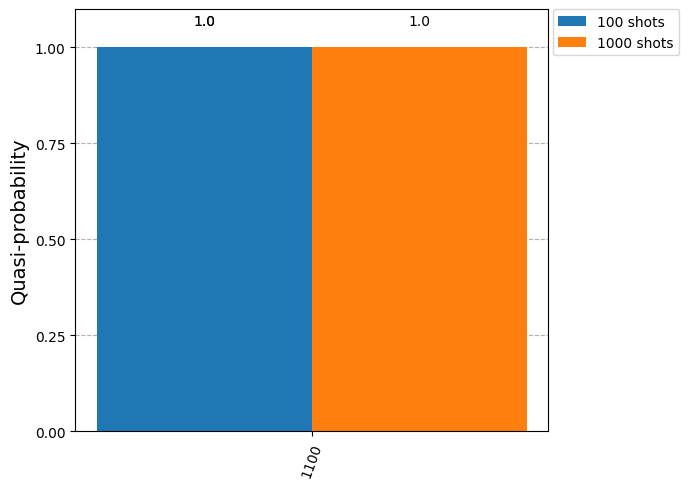

In [7]:
plot_distribution([counts_100,counts_1000], legend=["100 shots","1000 shots"])

In [9]:
from qiskit_ibm_runtime import QiskitRuntimeService
token = "nDLD07y8TqS3jvE-zdQ3RFLExYFd4E89wPIw4qV_tclN"
QiskitRuntimeService.save_account(
  token=token,
  channel="ibm_quantum_platform", # `channel` distinguishes between different account types.
  instance="crn:v1:bluemix:public:quantum-computing:us-east:a/2f903a94d6564bb2a042b9d46bda122d:6c4b797f-5ec9-4077-b5fa-bf87972e20d0::", # Optionally copy the instance CRN or name from the Instance section on the dashboard.
  name="Faryad-free-ibm", # Optionally name this set of credentials.
  overwrite=True # Only needed if you already have Cloud credentials.
)

In [10]:
# Load saved credentials if you specified a name
ibm_service = QiskitRuntimeService(name="Faryad-free-ibm")
ibmq_comp = ibm_service.backend('ibm_torino')

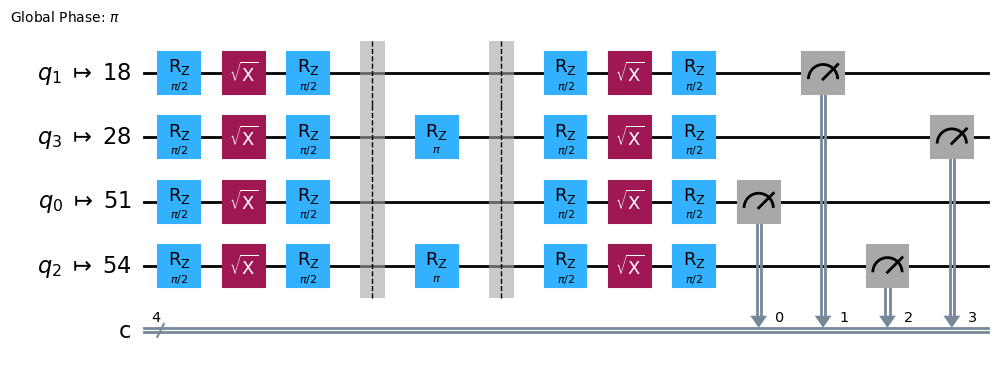

In [11]:
from qiskit import transpile
from qiskit_ibm_runtime import SamplerV2
from qiskit.visualization import plot_histogram


sampler_ibm = SamplerV2(mode = ibmq_comp)

qc_ibm_tr = transpile(qc, ibmq_comp)

qc_ibm_tr.draw('mpl')

In [12]:
job_ibm = sampler_ibm.run([(qc_ibm_tr,None,1000)])
print(job_ibm.job_id())

d1r27o76d0hc73ba2qqg


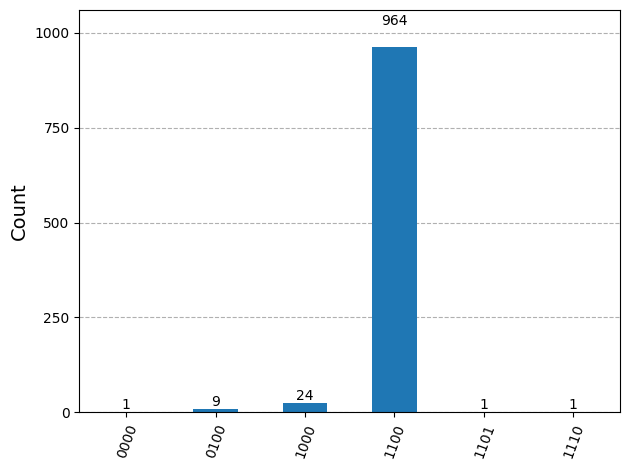

In [13]:
job_id = "d1r27o76d0hc73ba2qqg"
job_ibm = ibm_service.job(job_id)
#The results will be available when the job finishes.
results_ibm = job_ibm.result()
counts_ibm = results_ibm[0].data.c.get_counts()
plot_histogram(counts_ibm)

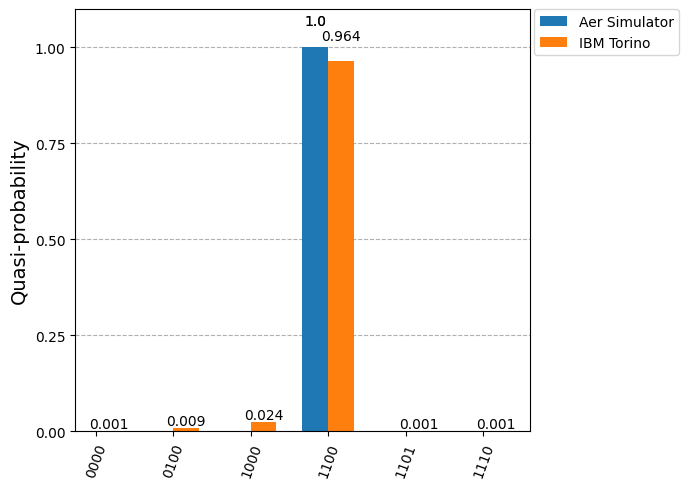

In [14]:
from qiskit.visualization import plot_distribution
plot_distribution([counts_1000,counts_ibm],legend=["Aer Simulator", "IBM Torino"])